In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%cd "/Users/macbookair/Desktop/DS360/Case Studies/Python/Python Foundation Case Study 2 - Credit Card Case Study"

/Users/macbookair/Desktop/DS360/Case Studies/Python/Python Foundation Case Study 2 - Credit Card Case Study


In [3]:
cust_acq = pd.read_csv('Customer Acqusition.csv')
repay = pd.read_csv('Repayment.csv')
spend = pd.read_csv('spend.csv')

In [4]:
cust_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 47.0+ KB


In [6]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [7]:
cred_data = pd.merge(cust_acq,spend,on='Customer',how='inner').drop(columns=['No','Sl No:'])
cred_data = pd.merge(cred_data,repay,on='Customer',how='inner').drop(columns= ['SL No:','Month_y'])
                                                                
cred_data.rename(columns={'Month_x':'Month','Amount_x':'Amount_spend','Amount_y':'Amount_paid'},inplace=True)

In [8]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37284 entries, 0 to 37283
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer      37284 non-null  object 
 1   Age           37284 non-null  int64  
 2   City          37284 non-null  object 
 3   Product       37284 non-null  object 
 4   Limit         37284 non-null  float64
 5   Company       37284 non-null  object 
 6   Segment       37284 non-null  object 
 7   Month         37284 non-null  object 
 8   Type          37284 non-null  object 
 9   Amount_spend  37284 non-null  float64
 10  Amount_paid   37284 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 3.4+ MB


In [9]:
# Converting Month to datetime data type
cred_data.Month= pd.to_datetime(cred_data.Month)

In [10]:
#1. In the above datase
#a. In case age is less than 18, replace it with mean of age values
cred_data.Age.where(cred_data.Age>=18,other=cred_data.Age.mean(),inplace=True)
cred_data.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount_spend,Amount_paid
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.8,165972.88


In [11]:
#cred_data[cred_data.Amount_spend>cred_data.Limit]

In [12]:
#b.In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
#(customer’s limit provided in acquisition table is the per transaction limit on his card)C

cred_data.Amount_spend.where(cred_data.Amount_spend<cred_data.Limit,other = (cred_data.Limit/2),inplace=True)

In [13]:
#cred_data[cred_data.Amount_spend>cred_data.Limit]

In [14]:
#c. Incase the repayment amount is more than the limit, replace the repayment with the
#limit.
cred_data[cred_data.Amount_paid>cred_data.Limit]


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount_spend,Amount_paid
324,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,185955.07
325,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,412783.34
326,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,148038.67
327,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,179144.68
329,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,381635.66
...,...,...,...,...,...,...,...,...,...,...,...
37270,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,RENTAL,50001.50,462283.02
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,310992.30
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,121874.90
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,337815.57


In [15]:
cred_data.Amount_paid.where(cred_data.Amount_paid<cred_data.Limit,other = (cred_data.Limit),inplace=True)

In [16]:
cred_data[cred_data.Amount_paid>cred_data.Limit]
cred_data[cred_data.Amount_paid==cred_data.Limit]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount_spend,Amount_paid
324,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,100000.0
325,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,100000.0
326,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,100000.0
327,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,100000.0
329,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00,100000.0
...,...,...,...,...,...,...,...,...,...,...,...
37270,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,2006-03-30,RENTAL,50001.50,100003.0
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,100000.0
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,10000.0
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,10001.0


In [17]:
#2. From the above dataset create the following summaries:

#a. How many distinct customers exist?

cust_acq.Customer.count()

100

In [18]:
len(cred_data.Customer.unique())

100

In [19]:
#b. How many distinct categories exist?

In [20]:
len(cred_data.Segment.unique())

5

In [21]:
#c. What is the average monthly spend by customers?


pd.pivot_table(data=cred_data,index=['Customer'],columns=cred_data.Month.dt.strftime('%m-%b-%Y')
              ,values='Amount_spend',aggfunc='mean').fillna(0)

Month,01-Jan-2004,01-Jan-2005,01-Jan-2006,02-Feb-2004,02-Feb-2005,02-Feb-2006,03-Mar-2004,03-Mar-2006,04-Apr-2004,04-Apr-2005,...,09-Sep-2004,09-Sep-2005,09-Sep-2006,10-Oct-2005,10-Oct-2006,11-Nov-2004,11-Nov-2005,11-Nov-2006,12-Dec-2005,12-Dec-2006
Customer,,,,,,,,,,,,,,,,,,,,,
A1,373274.006667,369694.070,0.0,52208.650,205992.4500,0.0,0.00,0.000000,0.00,0.00,...,0.00,0.0,0.00,0.0,244534.68,0.0,183839.61,0.00,0.0,0.0
A10,161144.326667,0.000,0.0,0.000,194557.6675,0.0,47866.78,178013.510000,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,459690.69,0.00,0.0,0.0
A100,50000.000000,0.000,0.0,0.000,0.0000,0.0,0.00,0.000000,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0
A11,130298.903333,0.000,0.0,164941.655,310743.0200,0.0,0.00,177102.153333,483603.21,0.00,...,0.00,0.0,67560.48,0.0,0.00,0.0,0.00,472854.21,0.0,0.0
A12,367429.962500,296796.305,0.0,214891.010,168148.0360,0.0,0.00,210351.497500,0.00,253078.21,...,479627.87,0.0,0.00,0.0,446841.82,0.0,383087.29,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A95,240401.500000,0.000,0.0,0.000,0.0000,0.0,0.00,0.000000,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0
A96,54729.660000,0.000,0.0,0.000,0.0000,0.0,0.00,0.000000,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0
A97,5000.000000,0.000,0.0,0.000,0.0000,0.0,0.00,0.000000,0.00,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0


In [22]:
pd.pivot_table(data=cred_data,index=['Customer'],columns=cred_data.Month.dt.strftime('%m-%b')
              ,values='Amount_spend',aggfunc='mean').fillna('No_transaction')

Month,01-Jan,02-Feb,03-Mar,04-Apr,05-May,06-Jun,07-Jul,08-Aug,09-Sep,10-Oct,11-Nov,12-Dec
Customer,,,,,,,,,,,,
A1,372762.587143,175235.69,No_transaction,261649.25,361141.31,No_transaction,No_transaction,344372.1,No_transaction,244534.68,183839.61,No_transaction
A10,161144.326667,194557.6675,134631.266667,270721.68,189207.3925,No_transaction,239798.03,454827.23,No_transaction,No_transaction,459690.69,No_transaction
A100,50000.0,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction
A11,130298.903333,237842.3375,177102.153333,483603.21,323982.03,283779.68,No_transaction,404113.85,67560.48,No_transaction,472854.21,No_transaction
A12,343885.41,175938.531667,210351.4975,203568.253333,305626.7475,227499.343333,77725.32,319708.92,479627.87,446841.82,383087.29,No_transaction
...,...,...,...,...,...,...,...,...,...,...,...,...
A95,240401.5,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction
A96,54729.66,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction
A97,5000.0,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction,No_transaction


In [23]:
pd.pivot_table(data=cred_data,index=['Customer',cred_data.Month.dt.strftime('%m-%b')]
              ,values='Amount_spend',aggfunc='mean').dropna().rename(columns={'Amount_spend':'Average spend'})


Average spend
Customer Month                
A1       01-Jan  372762.587143
         02-Feb  175235.690000
         04-Apr  261649.250000
         05-May  361141.310000
         08-Aug  344372.100000
...                        ...
A95      01-Jan  240401.500000
A96      01-Jan   54729.660000
A97      01-Jan    5000.000000
A98      01-Jan    5000.500000
A99      01-Jan    5001.000000

[578 rows x 1 columns]

In [24]:
pd.pivot_table(data=cred_data,index=['Customer',cred_data.Month.dt.strftime('%Y-%m-%b')]
              ,values='Amount_spend',aggfunc='mean').dropna().rename(columns={'Amount_spend':'Average spend'})

Average spend
Customer Month                     
A1       2004-01-Jan  373274.006667
         2004-02-Feb   52208.650000
         2004-05-May  361141.310000
         2005-01-Jan  369694.070000
         2005-02-Feb  205992.450000
...                             ...
A95      2004-01-Jan  240401.500000
A96      2004-01-Jan   54729.660000
A97      2004-01-Jan    5000.000000
A98      2004-01-Jan    5000.500000
A99      2004-01-Jan    5001.000000

[807 rows x 1 columns]

In [25]:
#d. What is the average monthly repayment by customers?
pd.pivot_table(data=cred_data,index=['Customer',cred_data.Month.dt.strftime('%Y-%m-%b')]
              ,values='Amount_paid',aggfunc='mean').dropna().rename(columns={'Amount_paid':'Average payment'})





Average payment
Customer Month                       
A1       2004-01-Jan    264093.981667
         2004-02-Feb    264093.981667
         2004-05-May    264093.981667
         2005-01-Jan    264093.981667
         2005-02-Feb    264093.981667
...                               ...
A95      2004-01-Jan    369405.960000
A96      2004-01-Jan    100000.000000
A97      2004-01-Jan     10000.000000
A98      2004-01-Jan     10001.000000
A99      2004-01-Jan     10002.000000

[807 rows x 1 columns]

In [26]:
pd.pivot_table(data=cred_data,index=['Customer',cred_data.Month.dt.strftime('%m-%b')]
              ,values='Amount_paid',aggfunc='mean').dropna().rename(columns={'Amount_paid':'Average payment'})

Average payment
Customer Month                  
A1       01-Jan    264093.981667
         02-Feb    264093.981667
         04-Apr    264093.981667
         05-May    264093.981667
         08-Aug    264093.981667
...                          ...
A95      01-Jan    369405.960000
A96      01-Jan    100000.000000
A97      01-Jan     10000.000000
A98      01-Jan     10001.000000
A99      01-Jan     10002.000000

[578 rows x 1 columns]

In [27]:
#e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
#(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
#Monthly spend. Interest is earned only on positive profits and not on negative amounts).


cred_data['Profit']= 0.029*(cred_data['Amount_paid']-cred_data['Amount_spend'])

cred_data['Year-Month']=cred_data.Month.dt.strftime('%Y-%m')

pd.pivot_table(data=cred_data,index= 'Year-Month', values= 'Profit', aggfunc='sum')


,Profit
Year-Month,
2004-01,2.754332e+06
2004-02,5.979401e+05
2004-03,1.145361e+05
2004-04,5.277770e+05
2004-05,4.126419e+05
2004-09,-6.294846e+04
2004-11,5.744259e+05
2005-01,-1.030109e+06
2005-02,3.402289e+06


In [28]:
#What are the top 5 product types

pd.pivot_table(data=cred_data,index='Type', values='Amount_spend',aggfunc='sum').sort_values(by='Amount_spend',ascending=False).head(5)

,Amount_spend
Type,
CAMERA,7.517011e+08
PETRO,7.071549e+08
FOOD,5.478835e+08
AIR TICKET,5.401180e+08
TRAIN TICKET,5.344239e+08


In [29]:
# Which city is having maximum spend?

cred_data.groupby(by='City')['Amount_spend'].sum().nlargest(n=1)

City
COCHIN    1.175903e+09
Name: Amount_spend, dtype: float64

In [30]:
#Which age group is spending more money?

cred_data['Age_group'] = pd.qcut(cred_data.Age,3)


pd.pivot_table(data=cred_data, index='Age_group',values= 'Amount_spend', aggfunc='sum').nlargest(columns='Amount_spend',n=1)

,Amount_spend
Age_group,
"(36.0, 51.0]",2.456643e+09


In [31]:
#Who are the top 10 customers in terms of repayment

pd.pivot_table(data=cred_data,index='Customer',values='Amount_paid', aggfunc='sum').sort_values(by='Amount_paid').head(1)

,Amount_paid
Customer,
A77,3159.62


In [32]:
#3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
#representation for the same

spend_df=pd.pivot_table(data=cred_data,index='City',columns=[cred_data.Month.dt.year,'Product'],values='Amount_spend',aggfunc='sum')
spend_df

Month               2004                                     2005  \
Product             Gold      Platimum       Silver          Gold   
City                                                                
BANGALORE   2.480069e+08  2.942657e+07  28450890.41  3.570769e+08   
BOMBAY      1.877284e+08  2.344074e+07  17558937.99  2.488086e+08   
CALCUTTA    2.061567e+08  6.083832e+07   7900114.00  2.851718e+08   
CHENNAI     2.361608e+07  1.034750e+08   4146619.26  1.010055e+08   
COCHIN      1.862197e+08  7.704631e+07  17184164.74  3.353611e+08   
DELHI       7.807619e+07  5.103232e+06  18059029.10  4.731837e+07   
PATNA       4.166130e+07  2.003525e+07  19749592.67  8.375387e+07   
TRIVANDRUM  6.520778e+07  6.686198e+07   3819368.96  3.349015e+07   

Month                                          2006                             
Product         Platimum       Silver          Gold      Platimum       Silver  
City                                                                            
BANGALORE   2.242526e+07  18538095.66  3.293757e+08  1.732873e+07  30685840.02  
BOMBAY      1.833756e+07  15196573.82  2.035447e+08  2.429106e+07  20870001.80  
CALCUTTA    1.320896e+08   6309944.06  2.993109e+08  1.049773e+08  11515401.92  
CHENNAI     1.362300e+08   6789320.82  6.409397e+07  1.300648e+08   5450162.50  
COCHIN      1.372711e+08  15081595.56  2.711839e+08  1.161266e+08  20428705.05  
DELHI       8.894841e+06  14137723.47  6.887626e+07  3.182197e+06  19336599.39  
PATNA       5.189816e+07  25353891.58  6.145691e+07  2.261048e+07  16950090.00  
TRIVANDRUM  1.116447e+08   5128346.81  7.386419e+07  6.656952e+07   8811362.28

<AxesSubplot:xlabel='Month-Product', ylabel='City'>

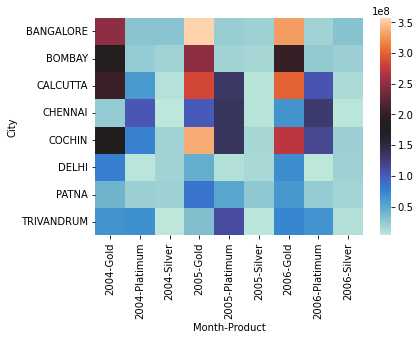

In [33]:
sns.heatmap(data=spend_df,cmap='icefire')

<Figure size 1440x1440 with 0 Axes>

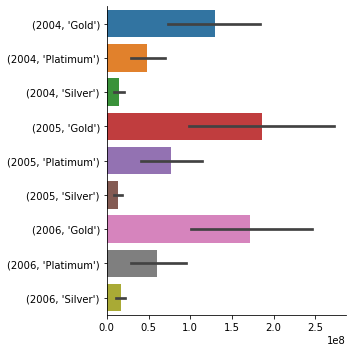

In [34]:
plt.figure(figsize=(20,20))
ax = sns.catplot(data=spend_df,kind='bar',orient='h')
ax

In [35]:
#a. Monthly comparison of total spends, city wise

df = pd.pivot_table(data=cred_data,index='City', columns='Year-Month', values = 'Amount_spend',aggfunc='sum').fillna(0)
df

Year-Month,2004-01,2004-02,2004-03,2004-04,2004-05,2004-09,2004-11,2005-01,2005-02,2005-04,...,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12
City,,,,,,,,,,,,,,,,,,,,,
BANGALORE,2.239851e+08,13185394.07,2500292.80,40861730.97,18920027.47,1000000.00,5431766.06,6754493.26,1.473016e+08,7383846.45,...,1.453223e+08,60592083.32,50552751.53,3357862.59,40217943.91,801681.39,17377783.60,17344488.38,11704688.79,9689081.00
BOMBAY,1.472477e+08,26925960.38,10808628.60,11547561.01,55005.50,14938477.97,17204643.96,18471384.91,5.488486e+07,17637421.34,...,1.130204e+08,21487043.65,12369545.09,4690908.41,5609515.92,14203349.32,0.00,17758669.90,23453686.54,3691255.51
CALCUTTA,2.199299e+08,16033014.50,12587924.84,705031.00,4309155.18,19730017.09,1600029.00,9233397.45,1.735429e+08,45555379.68,...,1.037501e+08,53489097.04,41627676.04,29154661.07,53854547.65,31817837.87,19355332.68,6087092.73,18093338.52,950019.00
CHENNAI,1.035868e+08,0.00,13265885.80,0.00,395935.02,13989048.19,0.00,9595195.35,9.359281e+07,6635460.65,...,7.052742e+07,59605150.88,2342052.61,14505643.07,13690623.28,9482155.07,1166649.21,2968696.23,9415822.92,4248937.13
COCHIN,2.125170e+08,6802939.58,4048429.47,14815255.13,26148794.21,14067677.80,2050047.50,78043424.66,9.667416e+07,4420989.94,...,1.299588e+08,75716036.67,27975564.20,5536540.70,28244024.09,25476812.32,17878631.81,17817400.86,28726478.90,6262378.80
DELHI,6.390750e+07,13579410.13,8009753.25,8913968.93,900027.00,1350027.00,4577769.69,0.00,1.443302e+07,5680373.82,...,4.641102e+07,5750081.00,20839137.53,1350027.00,900027.00,818666.73,0.00,0.00,0.00,10508353.69
PATNA,7.055790e+07,900018.00,1550000.00,6888226.59,1550000.00,0.00,0.00,23743958.76,3.972490e+07,28709141.51,...,3.295787e+07,20864965.25,17726902.58,900018.00,1550000.00,953848.98,1265939.10,2922596.37,1656542.07,0.00
TRIVANDRUM,1.016114e+08,20996945.28,0.00,6761635.16,6131278.27,0.00,387900.63,5338496.98,5.911586e+07,3779620.75,...,6.626960e+07,21766872.48,31292605.58,0.00,7764988.50,0.00,5767974.70,5735390.22,261369.70,9126235.17


<AxesSubplot:xlabel='Year-Month', ylabel='City'>

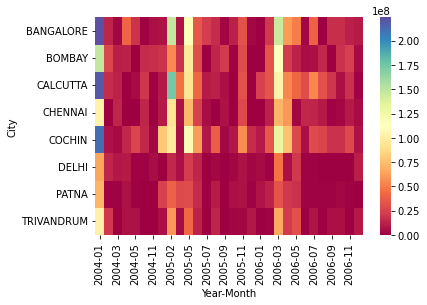

In [36]:
sns.heatmap(data=df,cmap='Spectral')

In [37]:
df2 = pd.pivot_table(data=cred_data,index=['City','Year-Month'], values = 'Amount_spend',aggfunc='sum').fillna(0).reset_index()
df2

,City,Year-Month,Amount_spend
0,BANGALORE,2004-01,2.239851e+08
1,BANGALORE,2004-02,1.318539e+07
2,BANGALORE,2004-03,2.500293e+06
3,BANGALORE,2004-04,4.086173e+07
4,BANGALORE,2004-05,1.892003e+07
...,...,...,...
207,TRIVANDRUM,2006-07,7.764988e+06
208,TRIVANDRUM,2006-09,5.767975e+06
209,TRIVANDRUM,2006-10,5.735390e+06
210,TRIVANDRUM,2006-11,2.613697e+05


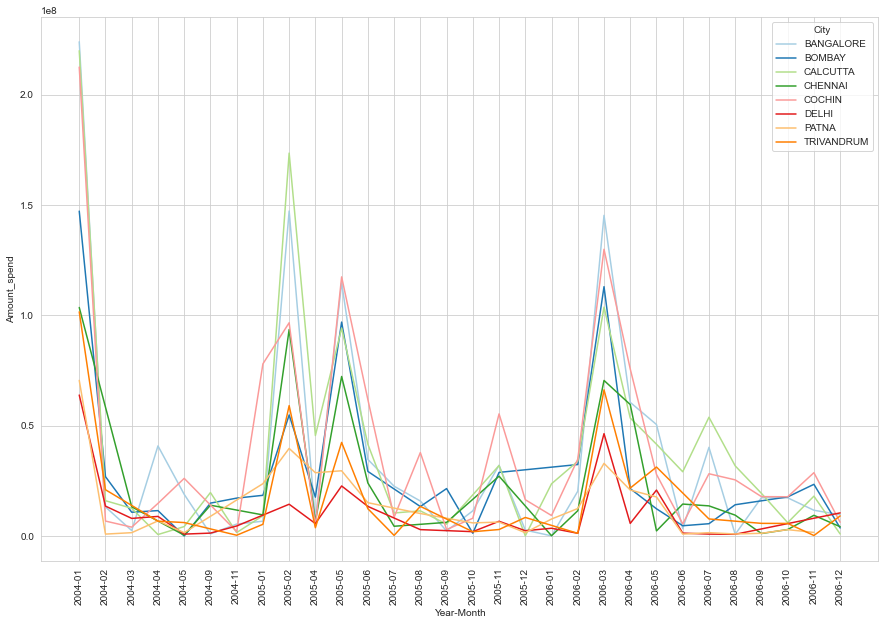

In [38]:
plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')
figure = sns.lineplot(data=df2,x='Year-Month', y = 'Amount_spend', hue='City',palette='Paired')
plt.xticks(rotation = 90)
plt.show()

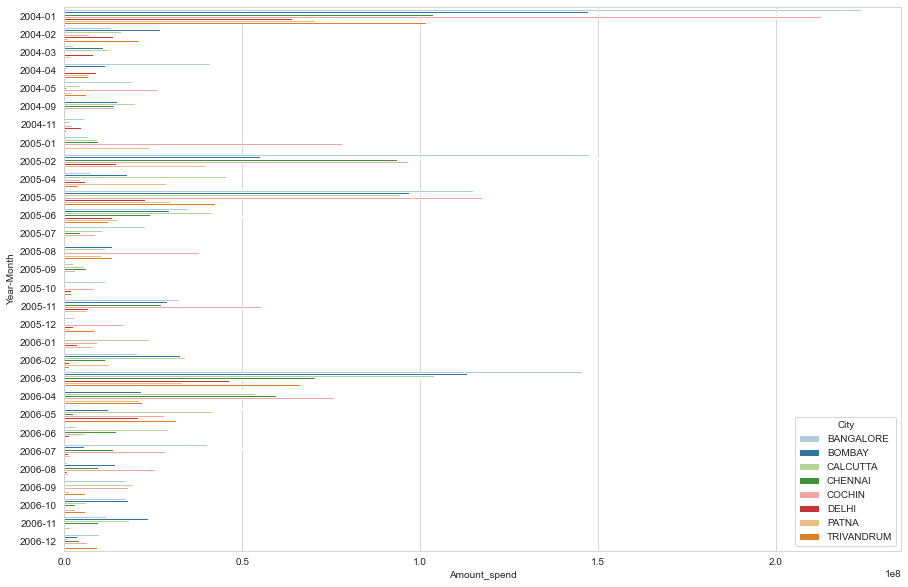

In [39]:
plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')
figure = sns.barplot(data=df2,y='Year-Month', x = 'Amount_spend', hue='City',palette='Paired')

plt.show()

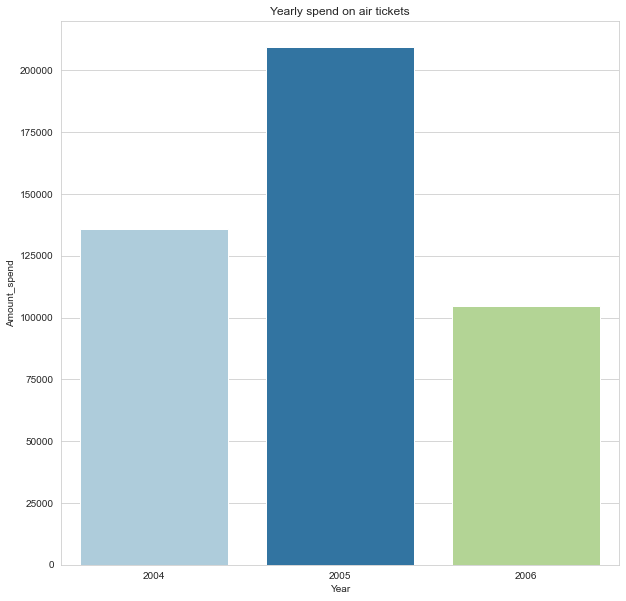

In [40]:
#b. Comparison of yearly spend on air tickets

df3  = pd.pivot_table(data=cred_data[cred_data.Type=="AIR TICKET"],index = cred_data.Month.dt.year,values='Amount_spend').reset_index()
df3
plt.figure(figsize=(10,10))
sns.set_style(style='whitegrid')
figure = sns.barplot(data=df3,x = 'Month',y = 'Amount_spend',palette='Paired')
plt.xlabel('Year')
plt.title('Yearly spend on air tickets')
plt.show()


In [41]:
cred_data

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount_spend,Amount_paid,Profit,Year-Month,Age_group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,495414.75,288.37455,2004-01,"(51.0, 79.0]"
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,245899.02,-6947.58162,2004-01,"(51.0, 79.0]"
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,259490.06,-6553.44146,2004-01,"(51.0, 79.0]"
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,437555.12,-1389.55472,2004-01,"(51.0, 79.0]"
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,165972.88,-9265.43968,2004-01,"(51.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37279,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,100000.00,1312.83986,2004-01,"(51.0, 79.0]"
37280,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,10000.00,145.00000,2004-01,"(51.0, 79.0]"
37281,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,10001.00,145.01450,2004-01,"(36.0, 51.0]"
37282,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,10002.00,145.02900,2004-01,"(18.999, 36.0]"


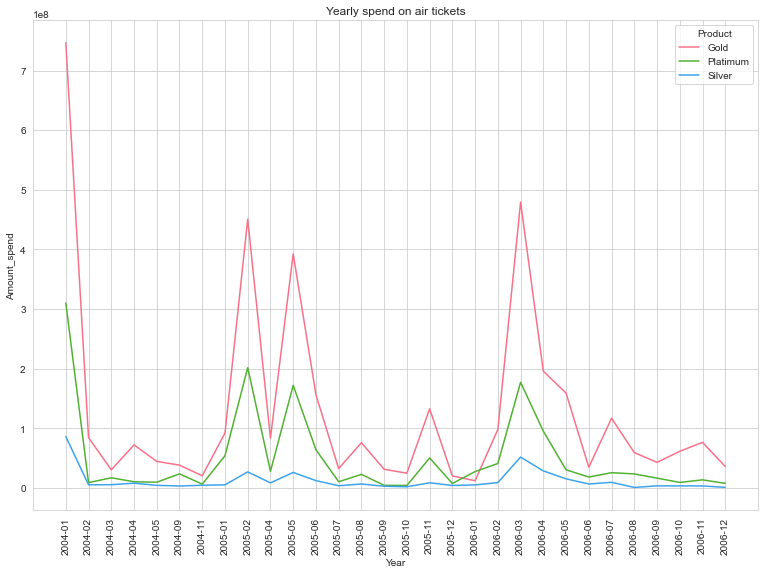

In [42]:
#c. Comparison of monthly spend for each product (look for any seasonality
#that exists in terms of spend)

df4  = pd.pivot_table(data=cred_data,index = ['Year-Month','Product'],values= 'Amount_spend',aggfunc='sum')
df4
plt.figure(figsize=(13,9))
sns.set_style(style='whitegrid')
figure = sns.lineplot(data=df4,x ='Year-Month',y = 'Amount_spend',palette='husl',hue='Product')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.title('Yearly spend on air tickets')
plt.show()

In [120]:
def top10customers():
    p = input('Enter the product ')
    p = p.capitalize()
    start = input('From(YYYY-MM) ')
    end = input('To(YYYY-MM) ')
    repay = cred_data[(cred_data['Product'] == p) & (
        cred_data['Year-Month'].between(start, end))]
    op = pd.pivot_table(data=repay, index=[
                    'City', 'Customer'], values='Amount_paid', aggfunc='sum').reset_index().sort_values(by=['City','Amount_paid'],ascending=[True,False])
    op['Rank'] = op.groupby(by='City')['City'].rank(method='first',ascending = False)
    
    print('\n\nTop 10 Customers in terms of repayment in each city\n\n',op[op.Rank<=10][['City','Customer','Rank']])
    

top10customers()

Enter the product Gold
From(YYYY-MM) 2004-02
To(YYYY-MM) 2004-12
Top 10 Customers in terms o frepayment in each city


,City,Customer,Rank
1,BANGALORE,A13,1.0
4,BANGALORE,A43,2.0
3,BANGALORE,A30,3.0
0,BANGALORE,A1,4.0
2,BANGALORE,A14,5.0
7,BOMBAY,A42,1.0
5,BOMBAY,A12,2.0
8,BOMBAY,A62,3.0
6,BOMBAY,A17,4.0
13,CALCUTTA,A60,1.0


In [111]:
  op = pd.pivot_table(data=cred_data, index = 'Customer',values='Amount_paid',aggfunc='sum').sort_values(by='Amount_paid',ascending=False)
op
repay

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount_spend,Amount_paid,Profit,Year-Month,Age_group
72,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,495414.75,3645.89972,2005-01,"(51.0, 79.0]"
73,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,245899.02,-3590.05645,2005-01,"(51.0, 79.0]"
74,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,259490.06,-3195.91629,2005-01,"(51.0, 79.0]"
75,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,437555.12,1967.97045,2005-01,"(51.0, 79.0]"
76,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,165972.88,-5907.91451,2005-01,"(51.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37226,A64,77.0,DELHI,Gold,500000.0,C26,Salaried_MNC,2005-02-16,BUS TICKET,468684.01,110614.61,-10384.01260,2005-02,"(51.0, 79.0]"
37229,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,2005-02-23,BUS TICKET,98178.42,468922.60,10751.58122,2005-02,"(36.0, 51.0]"
37230,A65,41.0,COCHIN,Gold,500000.0,C27,Salaried_Pvt,2005-02-23,BUS TICKET,98178.42,230667.34,3842.17868,2005-02,"(36.0, 51.0]"
37233,A66,77.0,PATNA,Gold,500000.0,C28,Govt,2005-02-03,BUS TICKET,162670.43,477039.78,9116.71115,2005-02,"(51.0, 79.0]"


In [62]:

cred_data[(cred_data['Product']=='Gold')&(cred_data['Year-Month'].between(start,end))]

Enter the productGold
From(YYYY-MM)2004-05
To(YYYY-MM)2004-09


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount_spend,Amount_paid,Profit,Year-Month,Age_group
306,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-05-05,BUS TICKET,361141.31,495414.75,3893.92976,2004-05,"(51.0, 79.0]"
307,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-05-05,BUS TICKET,361141.31,245899.02,-3342.02641,2004-05,"(51.0, 79.0]"
308,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-05-05,BUS TICKET,361141.31,259490.06,-2947.88625,2004-05,"(51.0, 79.0]"
309,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-05-05,BUS TICKET,361141.31,437555.12,2216.00049,2004-05,"(51.0, 79.0]"
310,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-05-05,BUS TICKET,361141.31,165972.88,-5659.88447,2004-05,"(51.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36354,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,2004-05-05,RENTAL,452028.03,445448.00,-190.82087,2004-05,"(36.0, 51.0]"
36355,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,2004-05-05,RENTAL,452028.03,432084.39,-578.36556,2004-05,"(36.0, 51.0]"
36356,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,2004-05-05,RENTAL,452028.03,173324.28,-8082.40875,2004-05,"(36.0, 51.0]"
36357,A61,44.0,COCHIN,Gold,500000.0,C23,Govt,2004-05-05,RENTAL,452028.03,233180.43,-6346.58040,2004-05,"(36.0, 51.0]"
